In [408]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

In [409]:
train_df = pd.read_csv('solar_train.csv')
test_df = pd.read_csv('solar_test.csv')

In [410]:
train_df.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [411]:
train_df.shape

(26148, 12)

# Data Information and Description :

In [412]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      26148 non-null  int64  
 1   UNIXTime                26148 non-null  int64  
 2   Data                    26148 non-null  object 
 3   Time                    26148 non-null  object 
 4   Temperature             26148 non-null  int64  
 5   Pressure                26148 non-null  float64
 6   Humidity                26148 non-null  int64  
 7   WindDirection(Degrees)  26148 non-null  float64
 8   Speed                   26148 non-null  float64
 9   TimeSunRise             26148 non-null  object 
 10  TimeSunSet              26148 non-null  object 
 11  Radiation               26148 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 2.4+ MB


In [413]:
train_df.describe()

,Id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation
count,26148.000000,2.614800e+04,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000
mean,16337.578668,1.478046e+09,51.104865,30.422835,75.005239,143.259970,6.248521,208.044780
std,9449.975676,3.005885e+06,6.213912,0.054724,25.993102,82.988177,3.484166,316.090247
min,0.000000,1.472724e+09,34.000000,30.190000,11.000000,0.090000,0.000000,1.130000
25%,8125.750000,1.475533e+09,46.000000,30.400000,56.000000,81.977500,3.370000,1.230000
50%,16379.000000,1.478038e+09,50.000000,30.430000,85.000000,147.645000,5.620000,2.710000
75%,24507.250000,1.480478e+09,55.000000,30.460000,97.000000,179.220000,7.870000,358.945000
max,32685.000000,1.483265e+09,71.000000,30.560000,103.000000,359.950000,39.370000,1601.260000


In [414]:
train_df.shape

(26148, 12)

In [415]:
print('Minimum Radiation is :', train_df['Radiation'].min())
print('Maximum Radiation is :', train_df['Radiation'].max())

Minimum Radiation is : 1.13
Maximum Radiation is : 1601.26


In [416]:
print('Minimum Speed of wind is :', train_df['Speed'].min())
print('Maximum Speed of wind is :', train_df['Speed'].max())

Minimum Speed of wind is : 0.0
Maximum Speed of wind is : 39.37


In [417]:
print('Minimum Himidity is :', train_df['Humidity'].min())
print('Maximum Humidity is :', train_df['Humidity'].max())

Minimum Himidity is : 11
Maximum Humidity is : 103


In [418]:
print('Minimum Temperature is :', train_df['Temperature'].min())
print('Maximum Temperature is :', train_df['Temperature'].max())

Minimum Temperature is : 34
Maximum Temperature is : 71


In [419]:
print('Minimum Pressure is :', train_df['Pressure'].min())
print('Maximum Pressure is :', train_df['Pressure'].max())

Minimum Pressure is : 30.19
Maximum Pressure is : 30.56


In [420]:
train_df['Pressure'].mean()

30.422835016061004

In [421]:
train_df['month'] = train_df['Data'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
train_df['date'] = train_df['Data'].apply(lambda x : re.search(r'(?<=\/)\d+(?=\/)', x).group(0)).astype(int)
train_df['year'] = train_df['Data'].apply(lambda x : re.search(r'(?<=\/)\d+(?=\s)', x).group(0)).astype(int)

In [422]:
train_df['hour'] = train_df['Time'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
train_df['minute'] = train_df['Time'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
train_df['second'] = train_df['Time'].apply(lambda x : re.search(r'\d+$', x).group(0)).astype(int)

In [423]:
train_df['risehour'] = train_df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
train_df['riseminuter'] = train_df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

train_df['sethour'] = train_df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
train_df['setminute'] = train_df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [424]:
train_df.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet', 'UNIXTime'], axis = 1, inplace = True)

In [425]:
train_df.head()

,Id,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation,month,date,year,hour,minute,second,risehour,riseminuter,sethour,setminute
0,4152,57,30.45,68,26.70,4.50,680.04,9,14,2016,8,50,5,6,10,18,26
1,13047,50,30.47,96,144.96,10.12,277.37,10,12,2016,7,25,21,6,16,18,2
2,7420,47,30.48,56,119.52,3.37,1.29,10,31,2016,23,40,20,6,23,17,49
3,6508,57,30.47,93,38.61,2.25,544.75,9,4,2016,8,25,5,6,8,18,35
4,29110,41,30.23,103,177.55,2.25,1.22,12,16,2016,0,50,34,6,50,17,46


In [426]:
train_df.drop(['risehour', 'year'], axis = 1, inplace = True)

In [427]:
train_df.head()

,Id,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation,month,date,hour,minute,second,riseminuter,sethour,setminute
0,4152,57,30.45,68,26.70,4.50,680.04,9,14,8,50,5,10,18,26
1,13047,50,30.47,96,144.96,10.12,277.37,10,12,7,25,21,16,18,2
2,7420,47,30.48,56,119.52,3.37,1.29,10,31,23,40,20,23,17,49
3,6508,57,30.47,93,38.61,2.25,544.75,9,4,8,25,5,8,18,35
4,29110,41,30.23,103,177.55,2.25,1.22,12,16,0,50,34,50,17,46


# EDA :

<AxesSubplot:xlabel='Radiation', ylabel='Count'>

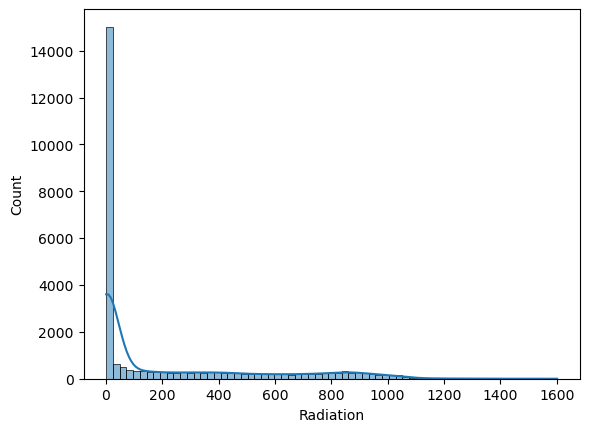

In [428]:
sns.histplot(train_df['Radiation'], kde = True)

<AxesSubplot:xlabel='Speed', ylabel='Count'>

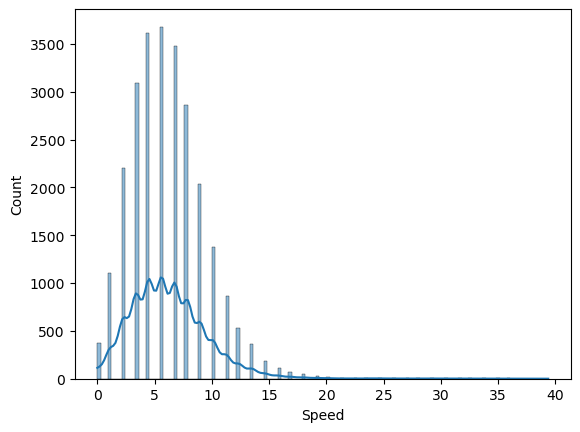

In [429]:
sns.histplot(train_df['Speed'], kde = True)

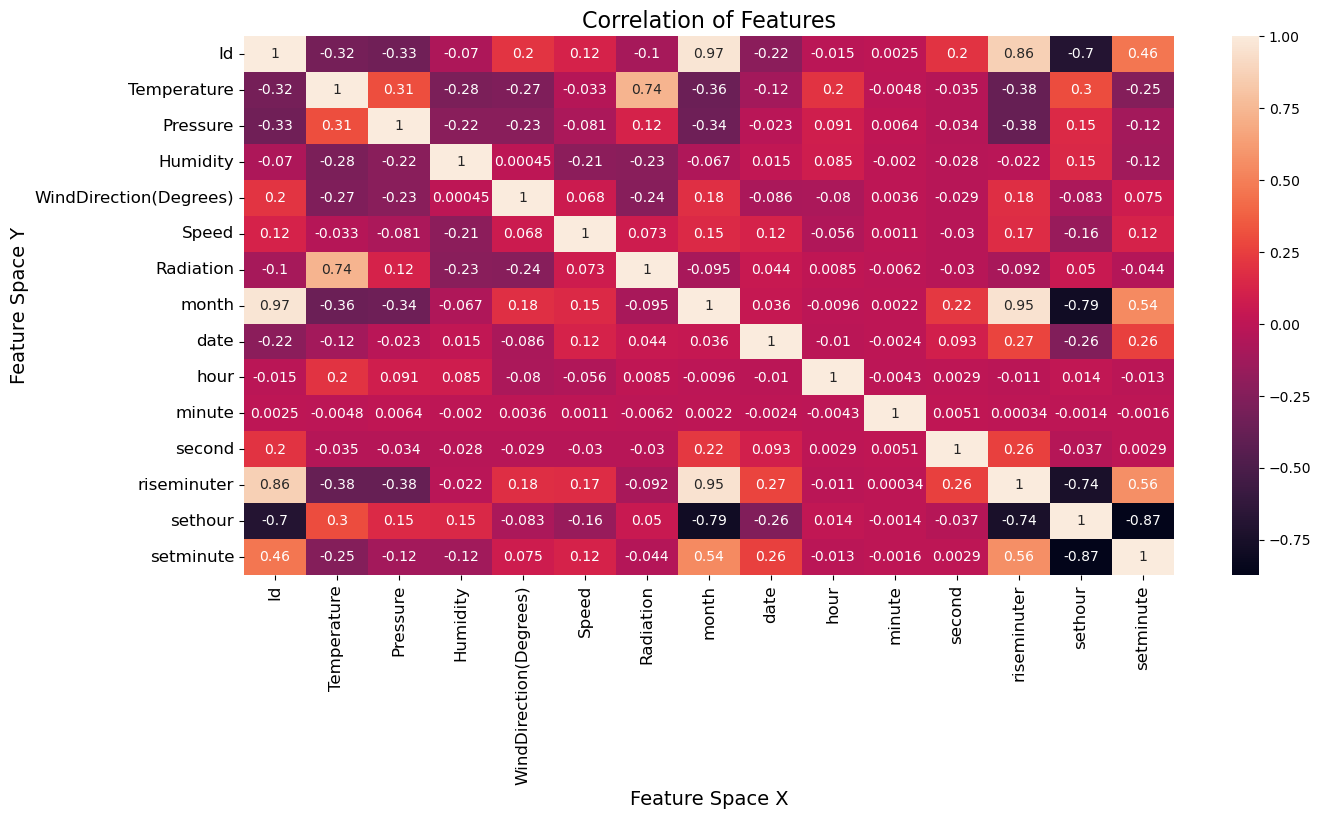

In [430]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

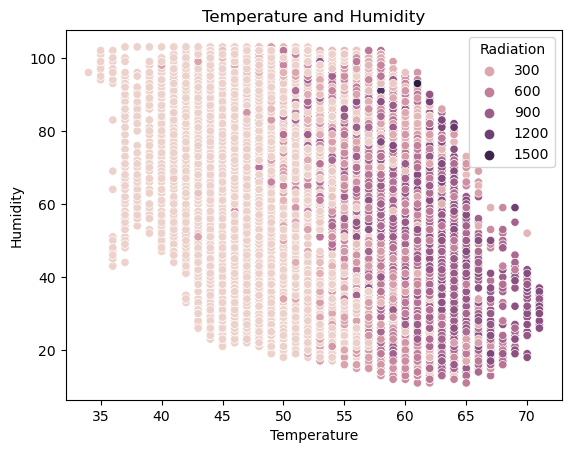

In [431]:
sns.scatterplot(x='Temperature', y='Humidity', hue='Radiation', data=train_df)
plt.title('Temperature and Humidity')
plt.show()

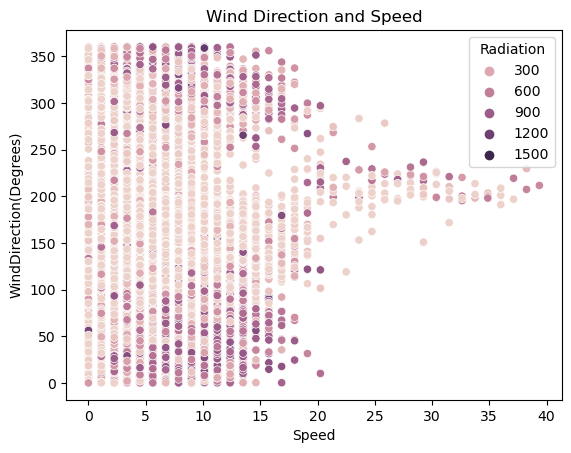

In [432]:
sns.scatterplot(x='Speed', y='WindDirection(Degrees)', hue='Radiation', data=train_df)
plt.title('Wind Direction and Speed')
plt.show()

In [433]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      26148 non-null  int64  
 1   Temperature             26148 non-null  int64  
 2   Pressure                26148 non-null  float64
 3   Humidity                26148 non-null  int64  
 4   WindDirection(Degrees)  26148 non-null  float64
 5   Speed                   26148 non-null  float64
 6   Radiation               26148 non-null  float64
 7   month                   26148 non-null  int32  
 8   date                    26148 non-null  int32  
 9   hour                    26148 non-null  int32  
 10  minute                  26148 non-null  int32  
 11  second                  26148 non-null  int32  
 12  riseminuter             26148 non-null  int32  
 13  sethour                 26148 non-null  int32  
 14  setminute               26148 non-null

In [434]:
train_df.skew()

Id                       -0.002733
Temperature               0.517641
Pressure                 -1.235213
Humidity                 -0.774669
WindDirection(Degrees)    0.562866
Speed                     1.499486
Radiation                 1.358960
month                    -0.016609
date                     -0.066138
hour                      0.001671
minute                   -0.002075
second                    0.832556
riseminuter               0.472088
sethour                   0.638685
setminute                -0.924075
dtype: float64

In [435]:
train_df.drop('Id', axis = 1, inplace = True)

In [436]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             26148 non-null  int64  
 1   Pressure                26148 non-null  float64
 2   Humidity                26148 non-null  int64  
 3   WindDirection(Degrees)  26148 non-null  float64
 4   Speed                   26148 non-null  float64
 5   Radiation               26148 non-null  float64
 6   month                   26148 non-null  int32  
 7   date                    26148 non-null  int32  
 8   hour                    26148 non-null  int32  
 9   minute                  26148 non-null  int32  
 10  second                  26148 non-null  int32  
 11  riseminuter             26148 non-null  int32  
 12  sethour                 26148 non-null  int32  
 13  setminute               26148 non-null  int32  
dtypes: float64(4), int32(8), int64(2)
memo

# Handling Outliers :

Temperature


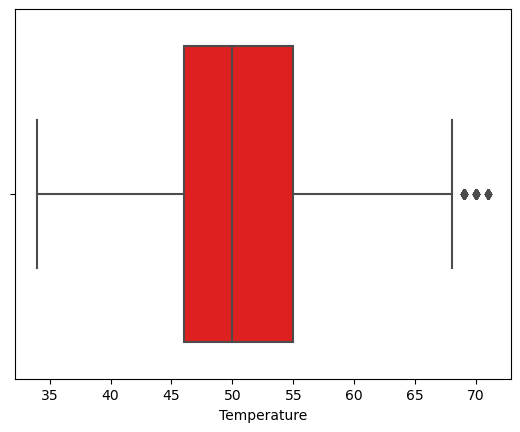

Pressure


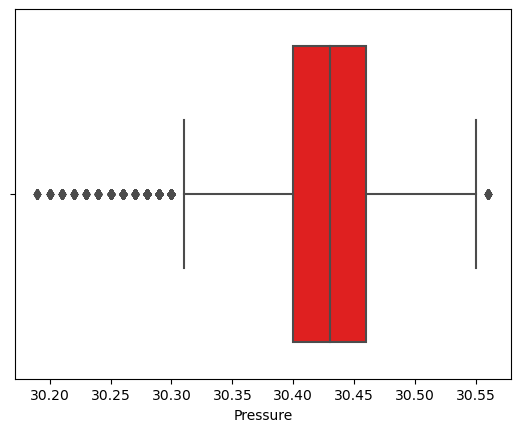

Humidity


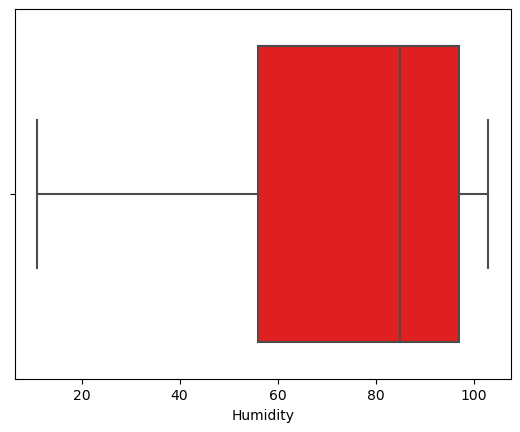

WindDirection(Degrees)


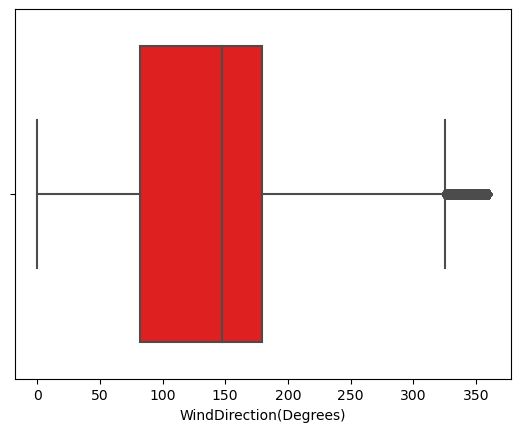

Speed


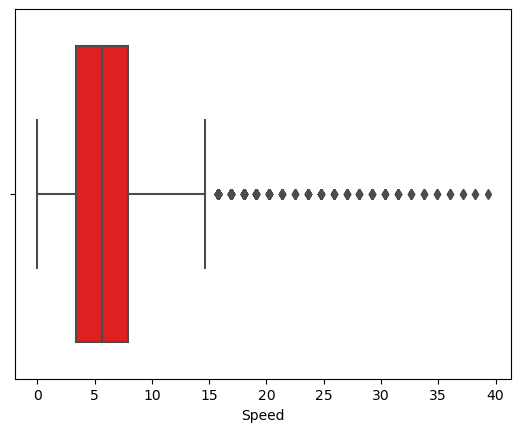

Radiation


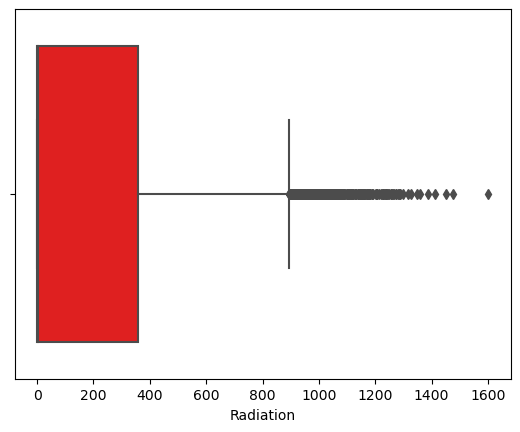

month


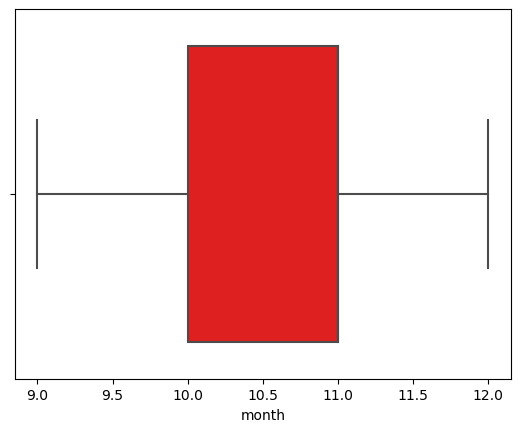

date


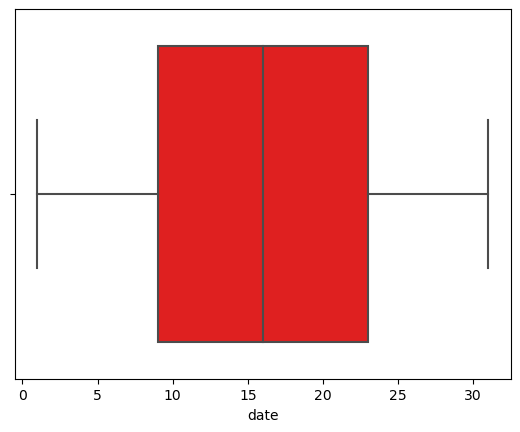

hour


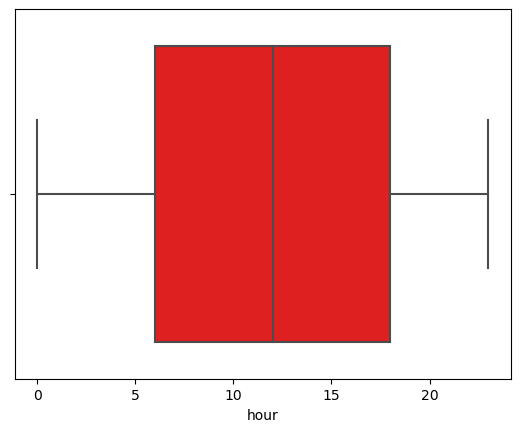

minute


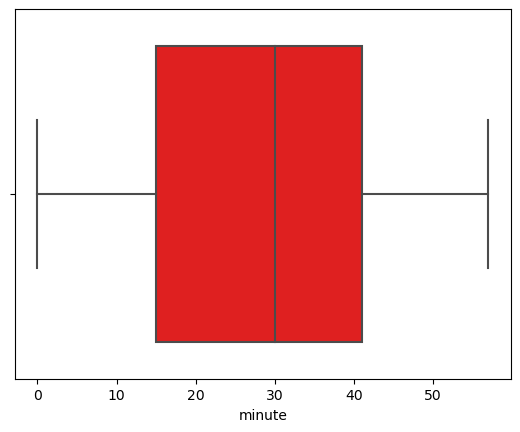

second


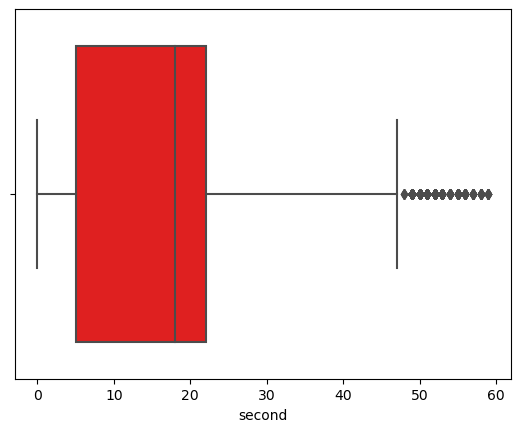

riseminuter


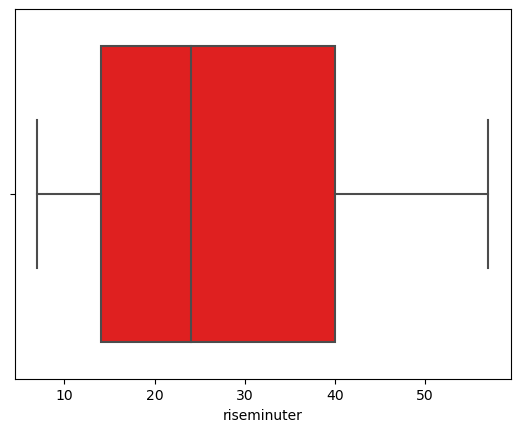

sethour


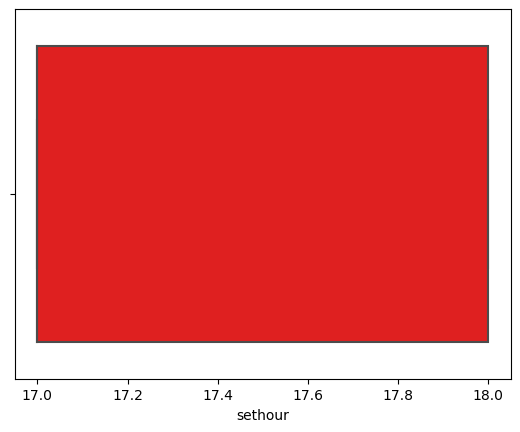

setminute


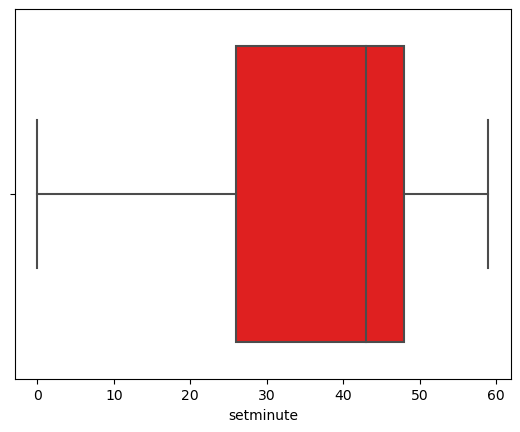

In [437]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [438]:
def Outlier(var):
    for x in var.iloc[:, :].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

Temperature


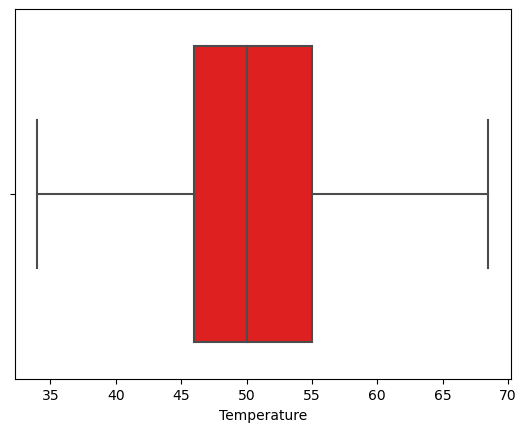

Pressure


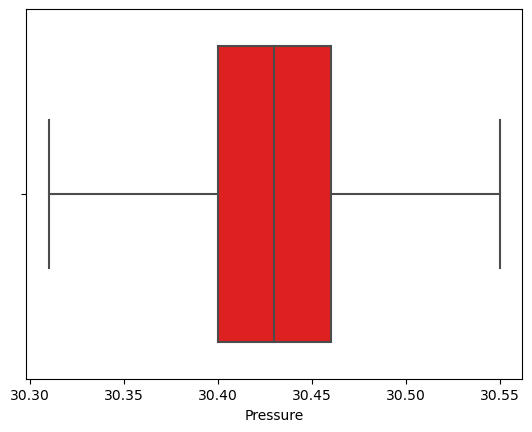

Humidity


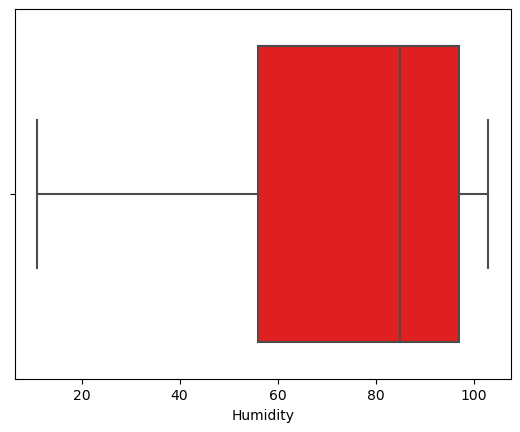

WindDirection(Degrees)


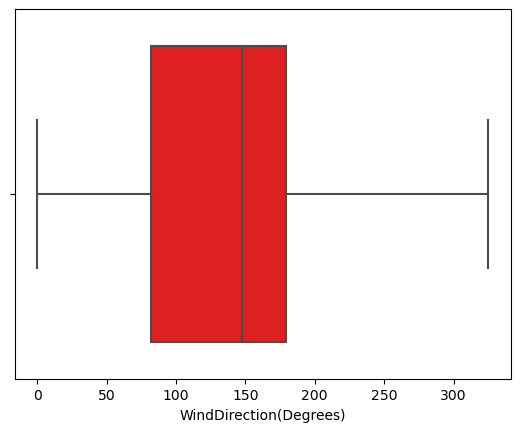

Speed


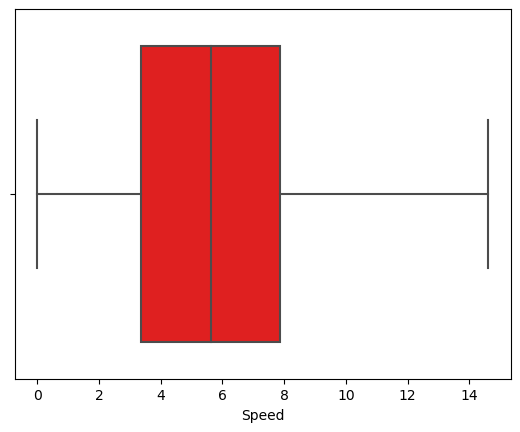

Radiation


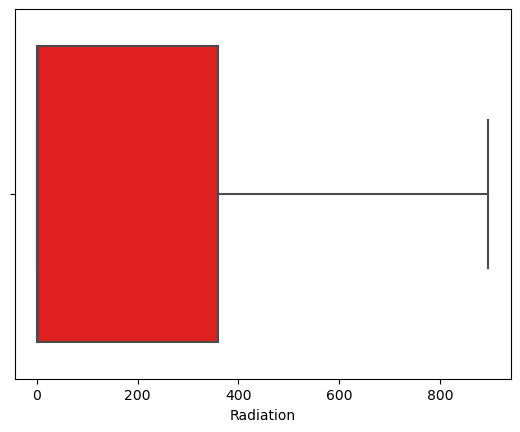

month


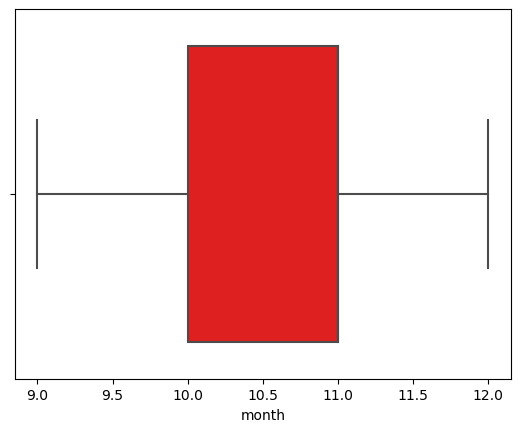

date


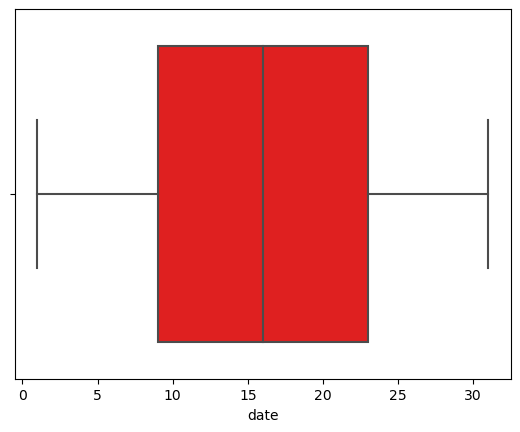

hour


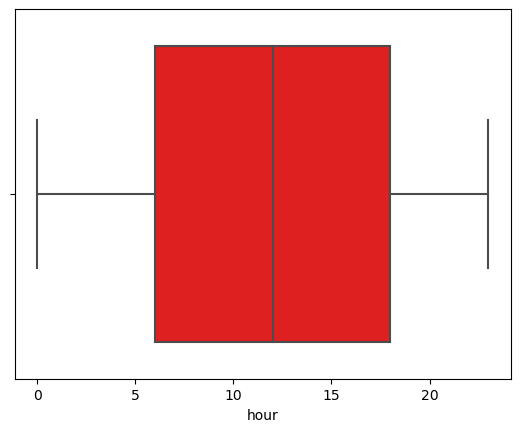

minute


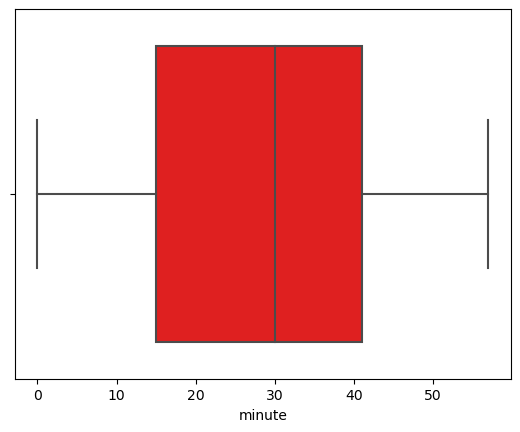

second


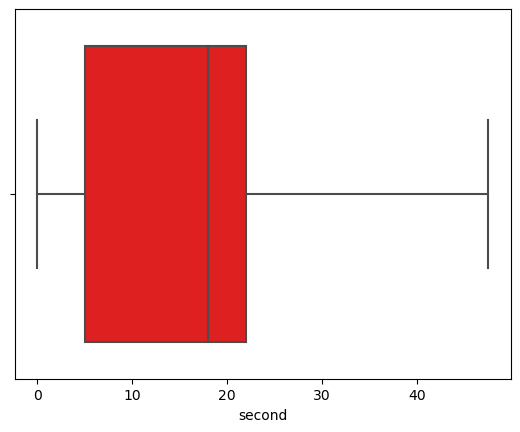

riseminuter


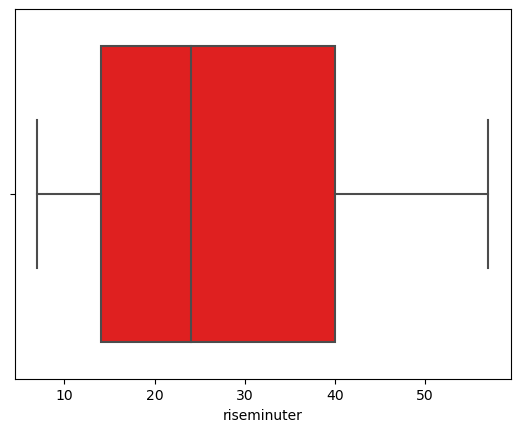

sethour


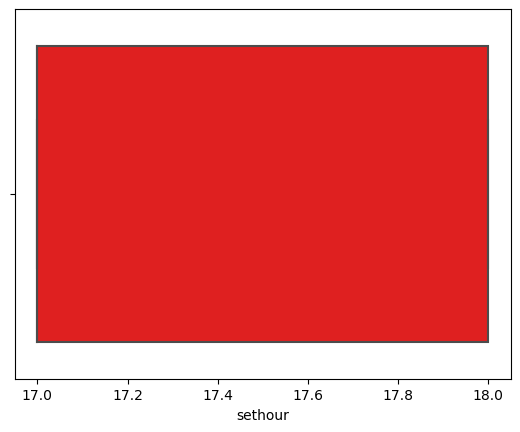

setminute


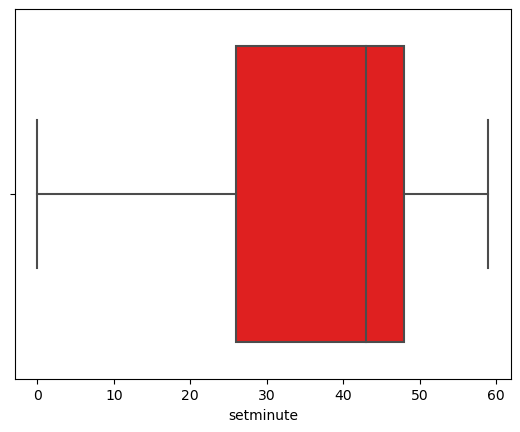

In [439]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

In [441]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             26148 non-null  float64
 1   Pressure                26148 non-null  float64
 2   Humidity                26148 non-null  float64
 3   WindDirection(Degrees)  26148 non-null  float64
 4   Speed                   26148 non-null  float64
 5   Radiation               26148 non-null  float64
 6   month                   26148 non-null  float64
 7   date                    26148 non-null  float64
 8   hour                    26148 non-null  float64
 9   minute                  26148 non-null  float64
 10  second                  26148 non-null  float64
 11  riseminuter             26148 non-null  float64
 12  sethour                 26148 non-null  float64
 13  setminute               26148 non-null  float64
dtypes: float64(14)
memory usage: 2.8 MB


In [442]:
df_train.skew()

Temperature               0.506644
Pressure                 -0.694082
Humidity                 -0.774669
WindDirection(Degrees)    0.444001
Speed                     0.512589
Radiation                 1.261539
month                    -0.016609
date                     -0.066138
hour                      0.001671
minute                   -0.002075
second                    0.680891
riseminuter               0.472088
sethour                   0.638685
setminute                -0.924075
dtype: float64

# Train-Test Split :

In [444]:
x = df_train.drop('Radiation', axis = 1)
y = df_train['Radiation']

In [445]:
x

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,date,hour,minute,second,riseminuter,sethour,setminute
0,57.0,30.45,68.0,26.70,4.50,9.0,14.0,8.0,50.0,5.0,10.0,18.0,26.0
1,50.0,30.47,96.0,144.96,10.12,10.0,12.0,7.0,25.0,21.0,16.0,18.0,2.0
2,47.0,30.48,56.0,119.52,3.37,10.0,31.0,23.0,40.0,20.0,23.0,17.0,49.0
3,57.0,30.47,93.0,38.61,2.25,9.0,4.0,8.0,25.0,5.0,8.0,18.0,35.0
4,41.0,30.31,103.0,177.55,2.25,12.0,16.0,0.0,50.0,34.0,50.0,17.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26143,50.0,30.31,96.0,304.22,12.37,12.0,13.0,14.0,45.0,9.0,48.0,17.0,45.0
26144,44.0,30.37,100.0,162.80,3.37,9.0,9.0,3.0,0.0,25.0,9.0,18.0,31.0
26145,48.0,30.42,64.0,158.90,4.50,9.0,26.0,22.0,55.0,19.0,12.0,18.0,15.0
26146,56.0,30.42,99.0,55.72,13.50,10.0,2.0,13.0,30.0,21.0,14.0,18.0,10.0


In [446]:
y

0        680.04
1        277.37
2          1.29
3        544.75
4          1.22
          ...  
26143    216.29
26144      1.47
26145      1.20
26146    659.12
26147      1.18
Name: Radiation, Length: 26148, dtype: float64

In [447]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [448]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18303, 13)
(7845, 13)
(18303,)
(7845,)


# StandardScaler :

In [449]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [450]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. Linear Regression:

In [451]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [452]:
model.fit(x_train, y_train)

LinearRegression()

In [453]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [454]:
y_pred_test

array([382.39713775,  36.45976052, 351.63067394, ..., -59.27550901,
       108.51565052, 692.16663508])

In [455]:
print('test', model.score(x_test, y_test))

test 0.6389544951505421


# Model Evaluation :

In [456]:
from sklearn.metrics import mean_squared_error, r2_score

In [457]:
RMSE_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [458]:
print('RMSE for train data is :', RMSE_lr_train)
print('RMSE for test data is :', RMSE_lr_test)

RMSE for train data is : 180.74044495142888
RMSE for test data is : 183.0906364968616


In [459]:
r2_lr_train = r2_score(y_train, y_pred_train)
r2_lr_test = r2_score(y_test, y_pred_test)
print('R2 score for train data is :', r2_lr_train)
print('R2 score for test data is :', r2_lr_test)

R2 score for train data is : 0.644138201215293
R2 score for test data is : 0.6389544951505421


<AxesSubplot:xlabel='Radiation'>

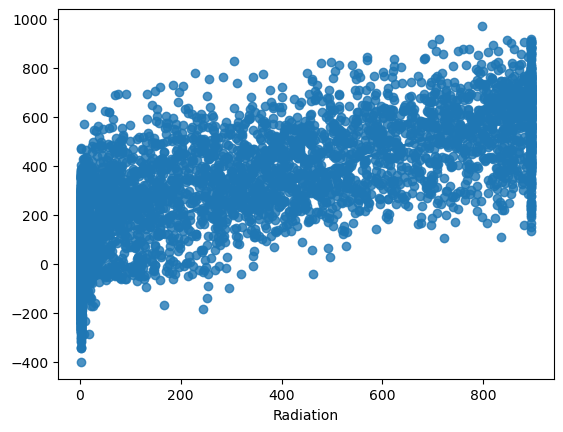

In [460]:
sns.regplot(y_test, y_pred_test)

# 2. RandomForest Regressor :

In [461]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [462]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [463]:
y_pred_rfr_train = rfr.predict(x_train)
y_pred_rfr_test = rfr.predict(x_test)

In [464]:
print('test', rfr.score(x_test, y_test))

test 0.9462251449261216


# Model Evaluation :

In [465]:
RMSE_rfr_train = np.sqrt(mean_squared_error(y_train, y_pred_rfr_train))
RMSE_rfr_test = np.sqrt(mean_squared_error(y_test, y_pred_rfr_test))

In [466]:
print('RMSE for train data is :', RMSE_rfr_train)
print('RMSE for test data is :', RMSE_rfr_test)

RMSE for train data is : 27.076019041505845
RMSE for test data is : 70.66018784652357


In [467]:
r2_rfr_train = r2_score(y_train, y_pred_train)
r2_rfr_test = r2_score(y_test, y_pred_test)
print('R2 score for train data is :', r2_rfr_train)
print('R2 score for test data is :', r2_rfr_test)

R2 score for train data is : 0.644138201215293
R2 score for test data is : 0.6389544951505421


<AxesSubplot:xlabel='Radiation'>

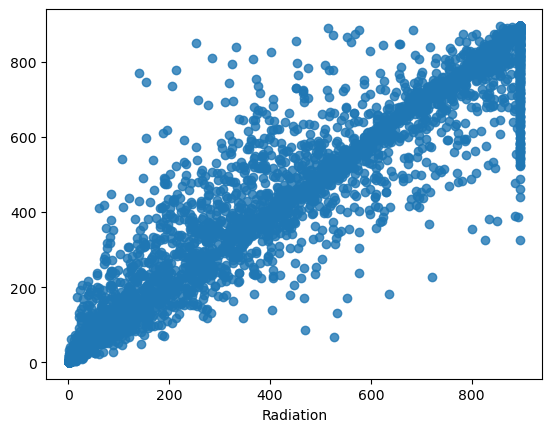

In [468]:
sns.regplot(y_test, y_pred_rfr_test)

# 3. VotingRegressor :

In [469]:
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
r1 = RandomForestRegressor()
r2 = DecisionTreeRegressor()
r3 =LinearRegression()

er = VotingRegressor([('rf', r1), ('dt', r2), ('lr', r3)])


In [470]:
er.fit(x_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('lr', LinearRegression())])

In [471]:
y_pred_vote_train = er.predict(x_train)
y_pred_vote_test = er.predict(x_test)

In [472]:
print('test', er.score(x_test, y_test))

test 0.9053194667244224


# Model Evaluation: 

In [473]:
RMSE_er_train = np.sqrt(mean_squared_error(y_train, y_pred_vote_train))
RMSE_er_test = np.sqrt(mean_squared_error(y_test, y_pred_vote_test))

In [474]:
print('RMSE for train data is :', RMSE_er_train)
print('RMSE for test data is :', RMSE_er_test)

RMSE for train data is : 64.45677837178313
RMSE for test data is : 93.75954929844055


In [475]:
r2_er_train = r2_score(y_train, y_pred_vote_train)
r2_er_test = r2_score(y_test, y_pred_vote_test)
print('R2 score for train data is :', r2_er_train)
print('R2 score for test data is :', r2_er_test)

R2 score for train data is : 0.9547406965528872
R2 score for test data is : 0.9053194667244224


<AxesSubplot:xlabel='Radiation'>

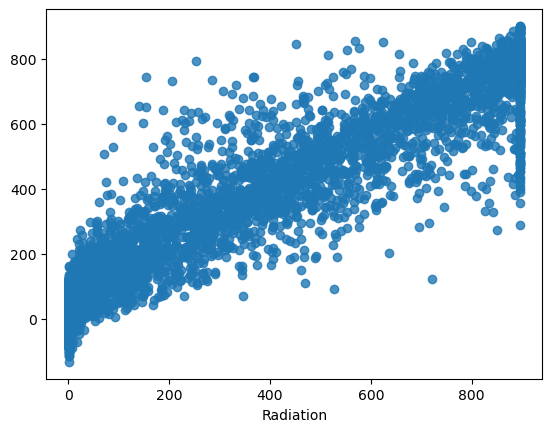

In [476]:
sns.regplot(y_test, y_pred_vote_test)

# 4. KNeighborsRegressor :

In [477]:
from sklearn.neighbors import KNeighborsRegressor
r1 = KNeighborsRegressor()

from sklearn.ensemble import BaggingRegressor

regr_BAG = BaggingRegressor(base_estimator=r1, n_estimators=10)

regr_BAG.fit(x_train,y_train)


BaggingRegressor(base_estimator=KNeighborsRegressor())

In [478]:
y_pred_bag_train = regr_BAG.predict(x_train)
y_pred_bag_test = regr_BAG.predict(x_test)

In [479]:
print('test', regr_BAG.score(x_test, y_test))

test 0.8536838962012613


# Model Evaluation :

In [480]:
RMSE_bag_train = np.sqrt(mean_squared_error(y_train, y_pred_bag_train))
RMSE_bag_test = np.sqrt(mean_squared_error(y_test, y_pred_bag_test))

In [482]:
print('RMSE for train data is :', RMSE_bag_train)
print('RMSE for test data is :', RMSE_bag_test)

RMSE for train data is : 93.17537178529388
RMSE for test data is : 116.55508550685181


In [483]:
r2_bag_train = r2_score(y_train, y_pred_bag_train)
r2_bag_test = r2_score(y_test, y_pred_bag_test)
print('R2 score for train data is :', r2_bag_train)
print('R2 score for test data is :', r2_bag_test)

R2 score for train data is : 0.9054257416753653
R2 score for test data is : 0.8536838962012613


<AxesSubplot:xlabel='Radiation'>

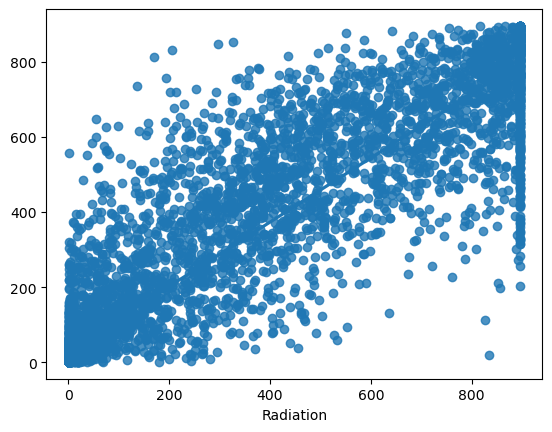

In [484]:
sns.regplot(y_test, y_pred_bag_test)

# 5. XGBRegressor :

In [485]:
from xgboost import XGBRegressor

In [486]:
xgb = XGBRegressor()

In [487]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [488]:
y_pred_xg_train = xgb.predict(x_train)
y_pred_xg_test = xgb.predict(x_test)

In [489]:
print('test', xgb.score(x_test, y_test))

test 0.9364059408525329


# Model Evaluation :

In [490]:
RMSE_xg_train = np.sqrt(mean_squared_error(y_train, y_pred_xg_train))
RMSE_xg_test = np.sqrt(mean_squared_error(y_test, y_pred_xg_test))

In [491]:
print('RMSE for train data is :', RMSE_xg_train)
print('RMSE for test data is :', RMSE_xg_test)

RMSE for train data is : 44.64175128543158
RMSE for test data is : 76.84107581422016


In [492]:
r2_xg_train = r2_score(y_train, y_pred_xg_train)
r2_xg_test = r2_score(y_test, y_pred_xg_test)
print('R2 score for train data is :', r2_xg_train)
print('R2 score for test data is :', r2_xg_test)

R2 score for train data is : 0.9782903349709713
R2 score for test data is : 0.9364059408525329


In [493]:
test_df.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,22107,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,3780,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,13651,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,30473,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,9084,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


In [494]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      6538 non-null   int64  
 1   UNIXTime                6538 non-null   int64  
 2   Data                    6538 non-null   object 
 3   Time                    6538 non-null   object 
 4   Temperature             6538 non-null   int64  
 5   Pressure                6538 non-null   float64
 6   Humidity                6538 non-null   int64  
 7   WindDirection(Degrees)  6538 non-null   float64
 8   Speed                   6538 non-null   float64
 9   TimeSunRise             6538 non-null   object 
 10  TimeSunSet              6538 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 562.0+ KB


In [495]:
test_df['month'] = test_df['Data'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
test_df['date'] = test_df['Data'].apply(lambda x : re.search(r'(?<=\/)\d+(?=\/)', x).group(0)).astype(int)
test_df['year'] = test_df['Data'].apply(lambda x : re.search(r'(?<=\/)\d+(?=\s)', x).group(0)).astype(int)

In [496]:
test_df['hour'] = test_df['Time'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
test_df['minute'] = test_df['Time'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
test_df['second'] = test_df['Time'].apply(lambda x : re.search(r'\d+$', x).group(0)).astype(int)

In [497]:
test_df['risehour'] = test_df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
test_df['riseminuter'] = test_df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

test_df['sethour'] = test_df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
test_df['setminute'] = test_df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [498]:
test_df.drop('Id', axis = 1, inplace = True)
test_df.drop('UNIXTime', axis = 1, inplace = True)
test_df.drop('Data', axis = 1, inplace = True)
test_df.drop('Time', axis = 1, inplace = True)
test_df.drop('TimeSunRise', axis = 1, inplace = True)
test_df.drop('TimeSunSet', axis = 1, inplace = True)

In [499]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             6538 non-null   int64  
 1   Pressure                6538 non-null   float64
 2   Humidity                6538 non-null   int64  
 3   WindDirection(Degrees)  6538 non-null   float64
 4   Speed                   6538 non-null   float64
 5   month                   6538 non-null   int32  
 6   date                    6538 non-null   int32  
 7   year                    6538 non-null   int32  
 8   hour                    6538 non-null   int32  
 9   minute                  6538 non-null   int32  
 10  second                  6538 non-null   int32  
 11  risehour                6538 non-null   int32  
 12  riseminuter             6538 non-null   int32  
 13  sethour                 6538 non-null   int32  
 14  setminute               6538 non-null   

In [500]:
test_df.drop(['risehour', 'year'], axis = 1, inplace = True)

In [501]:
test_df.skew()

Temperature               0.540498
Pressure                 -1.193679
Humidity                 -0.782914
WindDirection(Degrees)    0.590359
Speed                     1.354835
month                    -0.005359
date                     -0.040810
hour                     -0.019933
minute                   -0.017578
second                    0.849917
riseminuter               0.486429
sethour                   0.639218
setminute                -0.918713
dtype: float64

Temperature


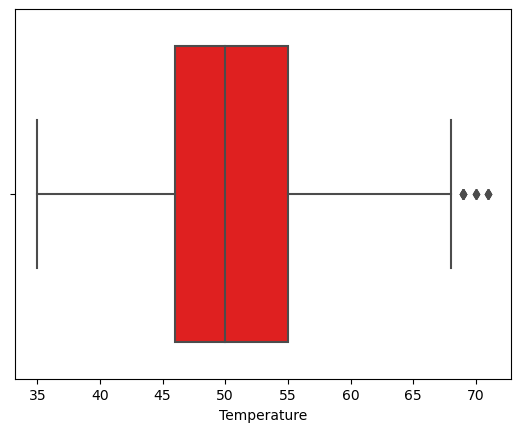

Pressure


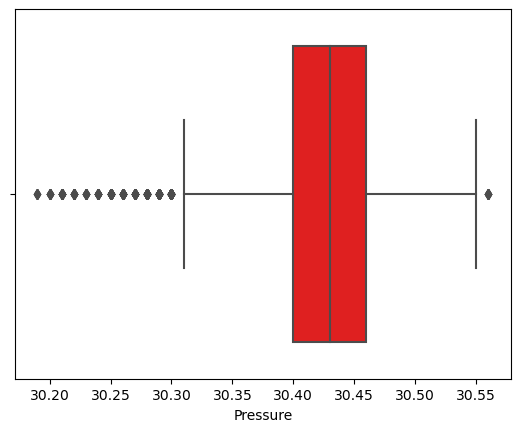

Humidity


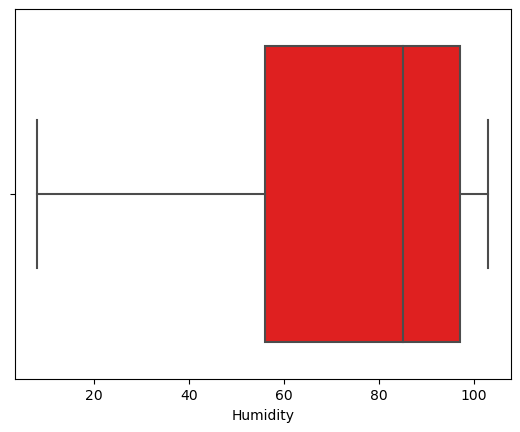

WindDirection(Degrees)


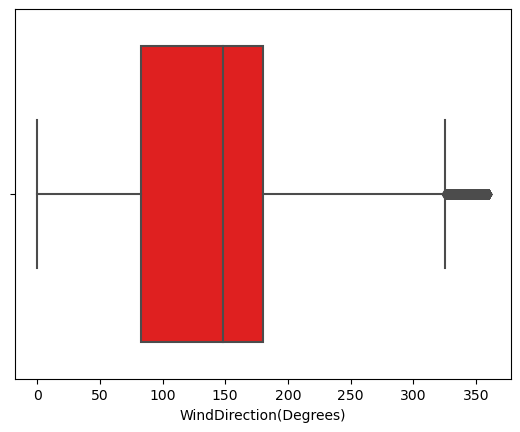

Speed


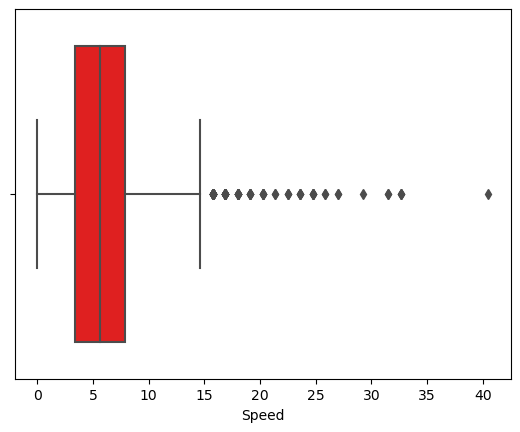

month


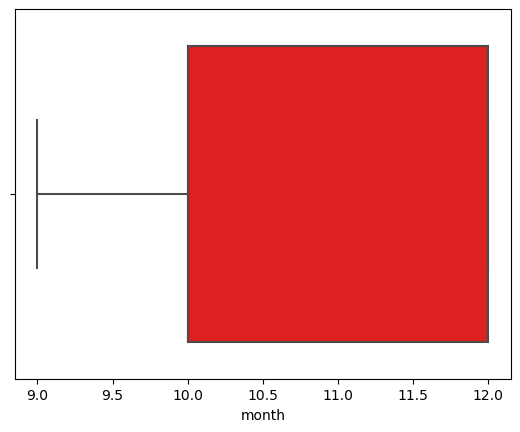

date


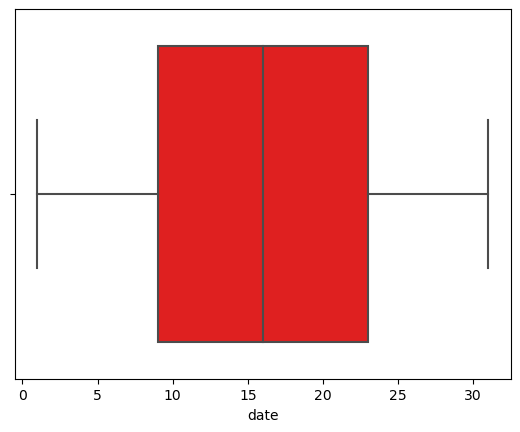

hour


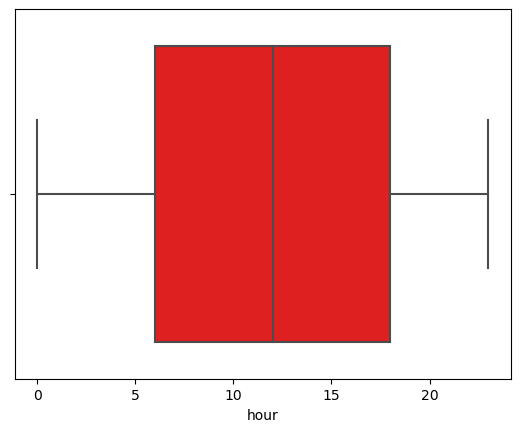

minute


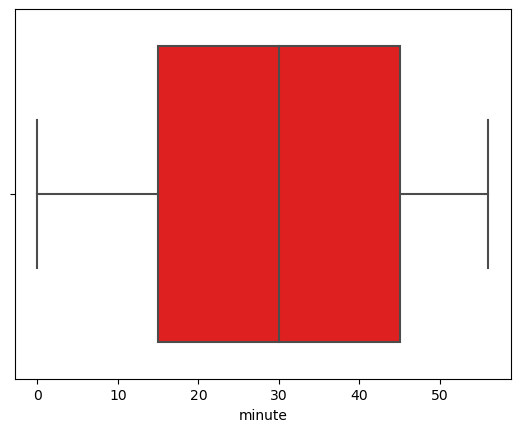

second


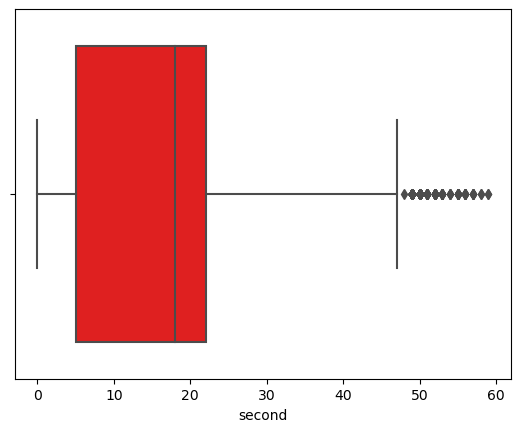

riseminuter


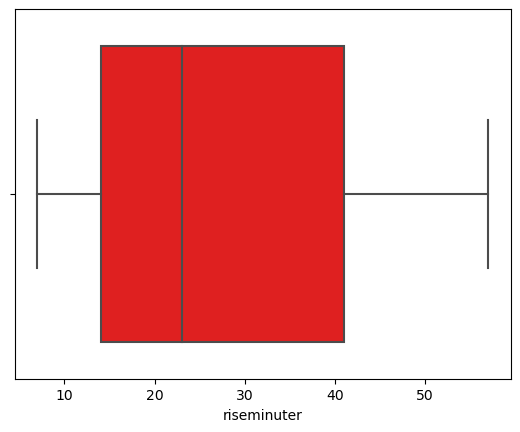

sethour


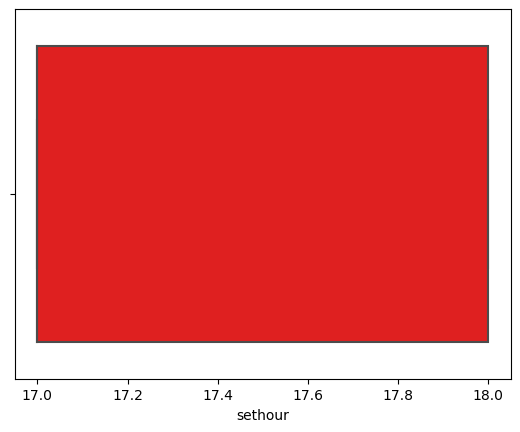

setminute


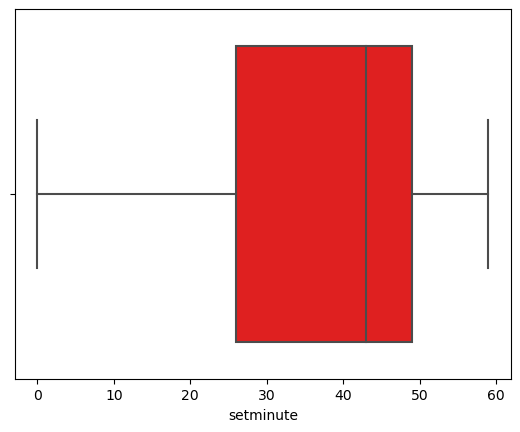

In [502]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [503]:
def Outlier(var):
    for x in var.iloc[:, :].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(test_df)

Temperature


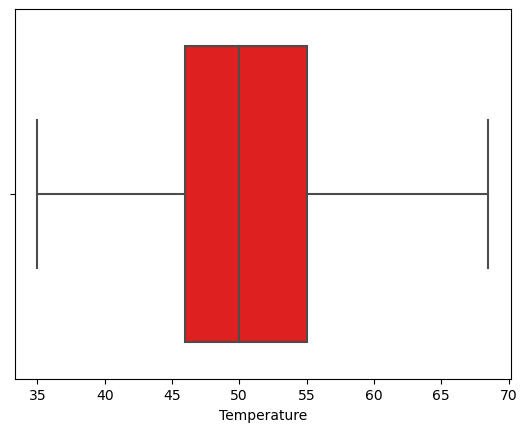

Pressure


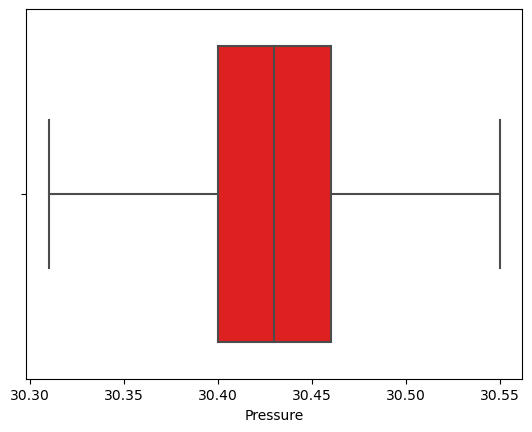

Humidity


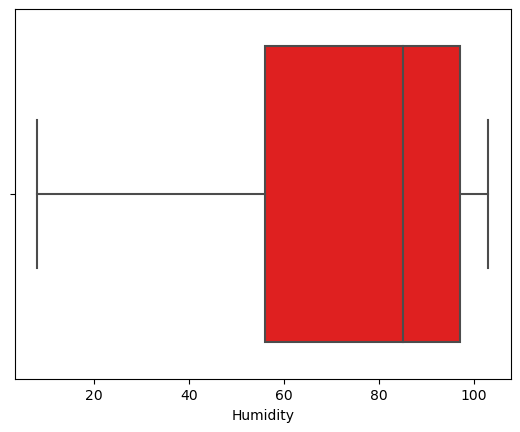

WindDirection(Degrees)


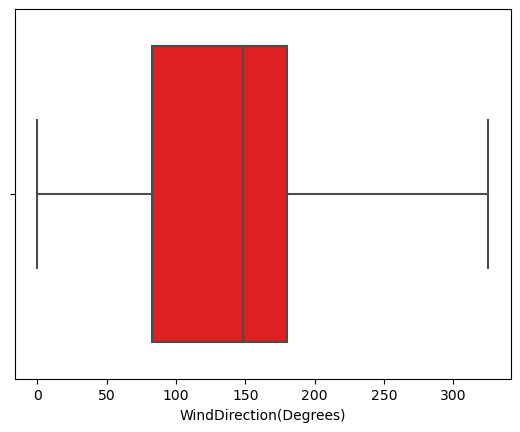

Speed


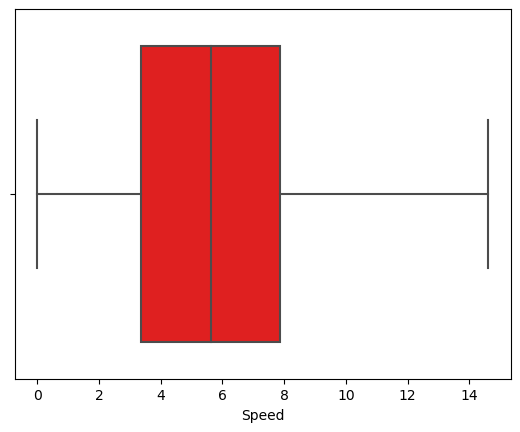

month


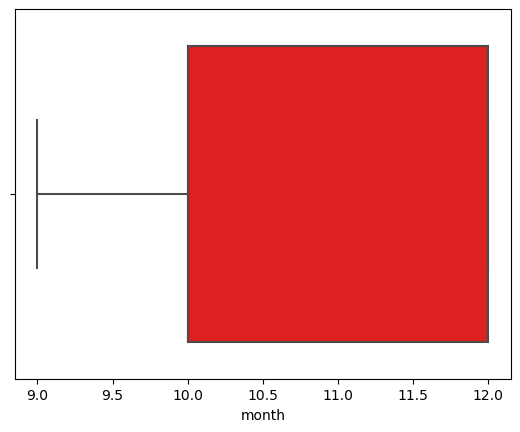

date


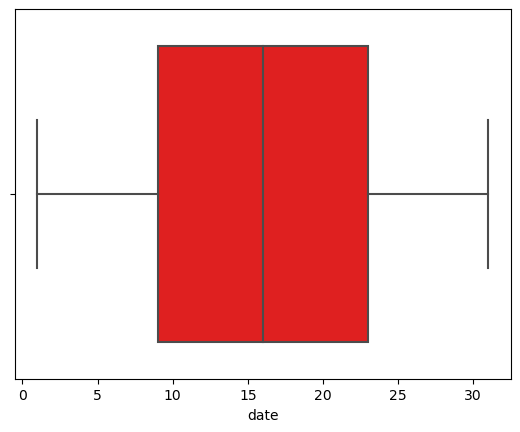

hour


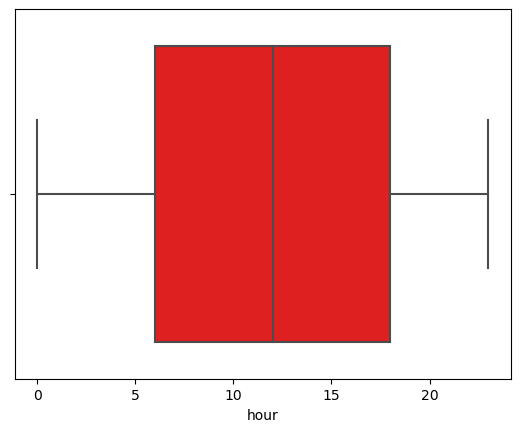

minute


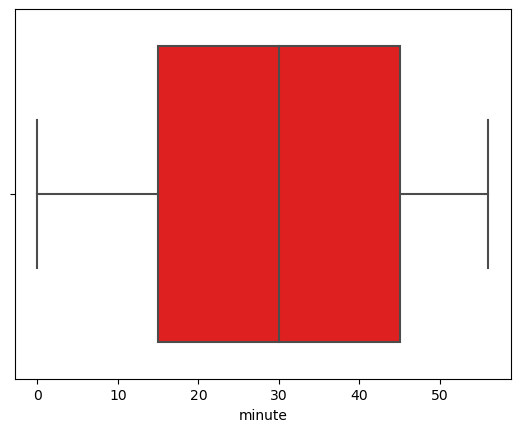

second


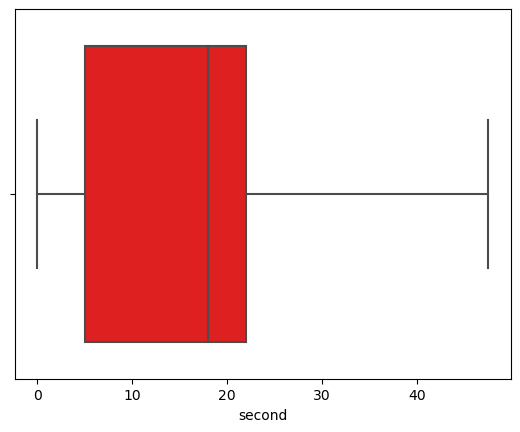

riseminuter


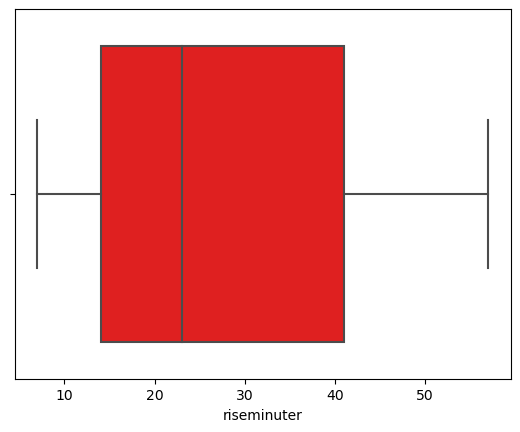

sethour


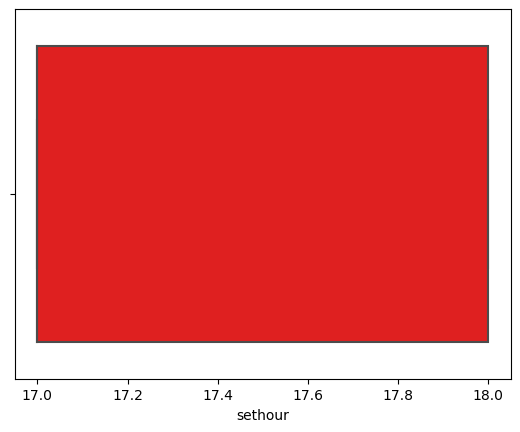

setminute


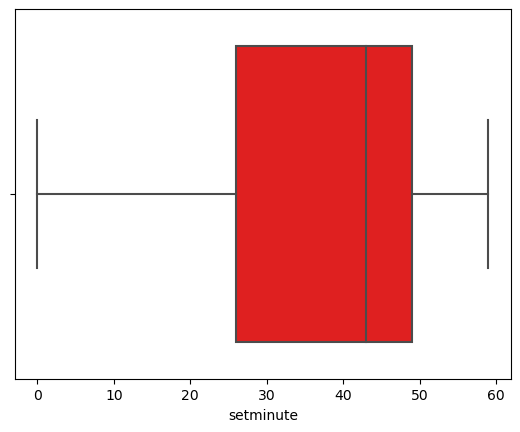

In [504]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [505]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             6538 non-null   float64
 1   Pressure                6538 non-null   float64
 2   Humidity                6538 non-null   float64
 3   WindDirection(Degrees)  6538 non-null   float64
 4   Speed                   6538 non-null   float64
 5   month                   6538 non-null   float64
 6   date                    6538 non-null   float64
 7   hour                    6538 non-null   float64
 8   minute                  6538 non-null   float64
 9   second                  6538 non-null   float64
 10  riseminuter             6538 non-null   float64
 11  sethour                 6538 non-null   float64
 12  setminute               6538 non-null   float64
dtypes: float64(13)
memory usage: 664.1 KB


In [506]:
predicted_test = xgb.predict(df_test)

In [507]:
predicted_test

array([200.52959, 200.52959, 200.52959, ..., 200.52959, 200.52959,
       200.52959], dtype=float32)

In [508]:
list(zip(y_test, predicted_test))

[(25.84, 200.52959),
 (1.93, 200.52959),
 (427.14, 200.52959),
 (1.22, 200.52959),
 (13.79, 200.52959),
 (1.26, 145.43849),
 (1.26, 225.89589),
 (480.37, 200.52959),
 (2.27, 200.52959),
 (1.35, 200.52959),
 (433.94, -10.794895),
 (17.93, 200.52959),
 (1.32, 200.52959),
 (243.41, 164.33725),
 (1.23, 207.39247),
 (1.25, 200.52959),
 (895.5174999999999, 200.52959),
 (152.4, 687.5736),
 (1.19, 200.52959),
 (1.22, 338.15036),
 (1.27, 200.52959),
 (3.07, 200.52959),
 (1.18, 207.39247),
 (846.5, 200.52959),
 (1.83, -10.794895),
 (881.33, 200.52959),
 (1.29, 200.52959),
 (1.2, 200.52959),
 (1.19, 200.52959),
 (157.14, 200.52959),
 (835.05, 200.52959),
 (1.19, 200.52959),
 (277.04, 200.52959),
 (1.25, 200.52959),
 (1.2, 225.89589),
 (1.23, 338.15036),
 (2.67, 138.08055),
 (349.91, 200.52959),
 (827.57, 207.39247),
 (1.24, 200.52959),
 (678.08, 200.52959),
 (679.67, 200.52959),
 (290.04, 207.39247),
 (1.49, 388.02908),
 (1.24, -10.794895),
 (313.54, 200.52959),
 (396.72, 200.52959),
 (107.62, 20

In [511]:
df_test['Radiation'] = predicted_test

In [512]:
df_test.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,date,hour,minute,second,riseminuter,sethour,setminute,Radiation
0,59.0,30.47,44.0,312.67,3.37,11.0,9.0,9.0,35.0,7.0,28.0,17.0,45.0,200.529587
1,59.0,30.48,83.0,38.01,6.75,9.0,16.0,12.0,5.0,3.0,10.0,18.0,25.0,200.529587
2,47.0,30.39,78.0,213.62,5.62,10.0,10.0,4.0,20.0,21.0,16.0,18.0,3.0,200.529587
3,45.0,30.40,98.0,176.63,4.50,12.0,11.0,6.0,50.0,47.5,47.0,17.0,44.0,200.529587
4,45.0,30.40,34.0,175.89,6.75,10.0,26.0,4.0,45.0,17.0,21.0,17.0,52.0,200.529587


In [513]:
df_test.to_csv('submission_solar.csv', index = False, header = False)